In [1]:
import pandas as pd
import numpy as np
from scipy.stats import permutation_test
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/'
dir = '/home/brainstimmaps/RESEARCH/20xx_Projects/2021_HDP/perm_test/'

In [4]:
def statistic(x,y):
  # Calculation of Mean Squared Error (MSE)
    return mean_squared_error(x,y)

## 0.5 Standarization

In [4]:
newdata = 'newdata9/'
best_level_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_level_clinical_model_HDP.csv')
best_level_clinical_model_CST = pd.read_csv(dir + newdata + 'best_level_clinical_model_CST.csv')
best_level_clinical_model_2 = pd.read_csv(dir + newdata + 'best_level_clinical_model_2.csv')

best_contact_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_contact_clinical_model_HDP.csv')
best_contact_clinical_model_CST = pd.read_csv(dir + newdata + 'best_contact_clinical_model_CST.csv')
best_contact_clinical_model_2 = pd.read_csv(dir + newdata + 'best_contact_clinical_model_2.csv')

In [5]:
mask1 = best_level_clinical_model_HDP['LeadID'].isin(['BaHe_R', 'KnEv_R', 'KaCl_R']) 
best_level_clinical_model_HDP = best_level_clinical_model_HDP[~mask1]

mask2 = best_level_clinical_model_2['LeadID'].isin(['BaHe_R', 'KnEv_R', 'KaCl_R']) 
best_level_clinical_model_2 = best_level_clinical_model_2[~mask2]

mask3 = best_contact_clinical_model_HDP['LeadID'].isin(['BaHe_R', 'KnEv_R', 'KaCl_R']) 
best_contact_clinical_model_HDP = best_contact_clinical_model_HDP[~mask3]

mask4 = best_contact_clinical_model_2['LeadID'].isin(['BaHe_R', 'KnEv_R', 'KaCl_R']) 
best_contact_clinical_model_2 = best_contact_clinical_model_2[~mask4]

mask5 = best_level_clinical_model_CST['LeadID'].isin(['BaHe_R', 'KnEv_R', 'KaCl_R']) 
best_level_clinical_model_CST = best_level_clinical_model_CST[~mask5]

mask6 = best_contact_clinical_model_CST['LeadID'].isin(['BaHe_R', 'KnEv_R', 'KaCl_R']) 
best_contact_clinical_model_CST = best_contact_clinical_model_CST[~mask6]

In [6]:
best_contact_clinical_model_HDP.groupby(best_contact_clinical_model_HDP['compare']).count()

LeadID  ContactID   mA  best_clin  mA_model  best_model
compare                                                         
False       116        116  116        116       116         116
True        180        180  180        180       180         180

In [7]:
188*100/296

63.513513513513516

/home/brainstimmaps/.local/lib/python3.9/site-packages/scipy/stats/_hypotests.py:1587: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


0.35135135135135137
0.001220998779001221


Text(0, 0.5, 'Frequency')

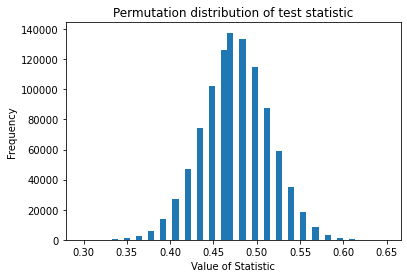

In [8]:
# Best level HDP
x = best_level_clinical_model_HDP.best_model
y = best_level_clinical_model_HDP.best_clin

# if our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((x, y), statistic, vectorized=False, permutation_type='pairings',
                       n_resamples=1000000, alternative='less')
print(res.statistic)
print(res.pvalue)

plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")

/home/brainstimmaps/.local/lib/python3.9/site-packages/scipy/stats/_hypotests.py:1587: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


0.30405405405405406
4.999995000005e-06


Text(0, 0.5, 'Frequency')

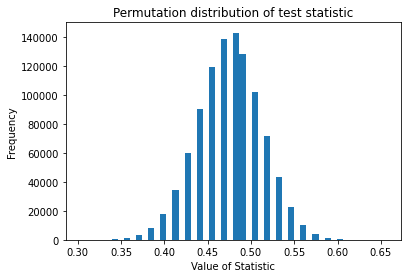

In [9]:
# Best level CST
x = best_level_clinical_model_CST.best_model
y = best_level_clinical_model_CST.best_clin

# if our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((x, y), statistic, vectorized=False, permutation_type='pairings',
                       n_resamples=1000000, alternative='less')
print(res.statistic)
print(res.pvalue)

plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")

In [9]:
# Best contact HDP
x = best_contact_clinical_model_HDP.best_model
y = best_contact_clinical_model_HDP.best_clin

In [12]:
def statistic(x,y):
  # Calculation of Mean Squared Error (MSE)
    return mean_squared_error(best_contact_clinical_model_HDP.best_clin,best_contact_clinical_model_HDP.best_model) - mean_squared_error(y,x)

0.0
0.1941988058011942


Text(0, 0.5, 'Frequency')

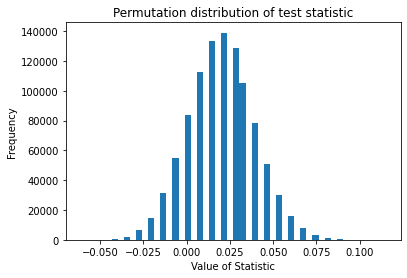

In [14]:
# if our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((x, y), statistic, vectorized=False, permutation_type='pairings',
                       n_resamples=1000000, alternative='less')
print(res.statistic)
print(res.pvalue)

plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")

In [227]:
x = best_contact_clinical_model_HDP.best_model
y = best_contact_clinical_model_HDP.best_clin
#rand = np.random.permutation(x)
rand = np.random.randint(2, size=len(x))
statistic(y,rand)

0.5304054054054054

In [228]:
rand.sum()

163

In [229]:
296/2

148.0

0.3310810810810811
0.002443997556002444


Text(0, 0.5, 'Frequency')

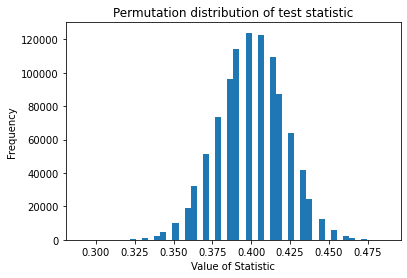

In [18]:
# Best contact CST
x = best_contact_clinical_model_CST.best_model
y = best_contact_clinical_model_CST.best_clin

# if our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((x, y), statistic, vectorized=False, permutation_type='pairings',
                       n_resamples=1000000, alternative='less')
print(res.statistic)
print(res.pvalue)

plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")

In [121]:
# Best level both
x = best_level_clinical_model_2.best_model
y = best_level_clinical_model_2.best_clin

# if our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((x, y), statistic, vectorized=False, permutation_type='pairings',
                       n_resamples=1000000, alternative='less')
print(res.statistic)
print(res.pvalue)

plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")

/home/brainstimmaps/.local/lib/python3.9/site-packages/scipy/stats/_hypotests.py:1587: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


KeyboardInterrupt: 

0.3952702702702703
0.9393520606479393


Text(0, 0.5, 'Frequency')

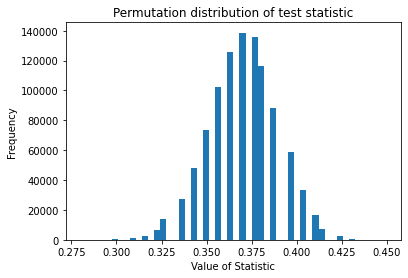

In [20]:
# Best contact both
x = best_contact_clinical_model_2.best_model
y = best_contact_clinical_model_2.best_clin

# if our statistic is vectorized, we pass `vectorized=True`
# `n_resamples=np.inf` indicates that an exact test is to be performed
res = permutation_test((x, y), statistic, vectorized=False, permutation_type='pairings',
                       n_resamples=1000000, alternative='less')
print(res.statistic)
print(res.pvalue)

plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")